In [ ]:
import numpy as np 
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving PesquisaPerfis.csv to PesquisaPerfis.csv


In [ ]:
import io
df = pd.read_csv(io.StringIO(uploaded['PesquisaPerfis.csv'].decode('utf-8')))

In [ ]:
list(df.columns)

['Idade',
 'Sexo',
 'Região do Brasil (Local onde mora atualmente)',
 'Classe Comportamental',
 'Grau de Instrução',
 'Estado Civil',
 'Filhos',
 'Qual tipo de surdez?',
 'Tem implante coclear?',
 'Usa aparelho auditivo?',
 'Qual foi a primeira Língua?',
 'Qual a língua de preferência?',
 'Sabe Libras?',
 'Quando aprendeu Libras?',
 'Nível de Leitura em Português',
 'Nível de Escrita em Português',
 'Quando aprendeu Português?',
 'Oraliza?',
 'Faz leitura labial?',
 'Como se comunica com a família?',
 'Como se comunica com desconhecidos?',
 'Como se comunica com amigos?',
 'Usa algum app para se comunicar?',
 'Usa legendas?',
 'Compra em loja física?',
 'Compra online?',
 'Preferência de Compra']

In [ ]:
df.drop("Motivo de compra em loja física", axis = 1, inplace=True)
df.drop("Motivo de compra em loja online ", axis = 1, inplace=True)

In [ ]:
df.head()

,Idade,Sexo,Região do Brasil (Local onde mora atualmente),Classe Comportamental,Grau de Instrução,Estado Civil,Filhos,Qual tipo de surdez?,Tem implante coclear?,Usa aparelho auditivo?,Qual foi a primeira Língua?,Qual a língua de preferência?,Sabe Libras?,Quando aprendeu Libras?,Nível de Leitura em Português,Nível de Escrita em Português,Quando aprendeu Português?,Oraliza?,Faz leitura labial?,Como se comunica com a família?,Como se comunica com desconhecidos?,Como se comunica com amigos?,Usa algum app para se comunicar?,Usa legendas?,Compra em loja física?,Compra online?,Preferência de Compra
0,26-30,F,Sudeste,C,Superior completo (ou graduação): concluiu o c...,União Estável,1,Adquirida,Não,Não,Português,Libras,Sim,Infância,Avançado,Avançado,Infância,Não Oraliza,Sim,Português Escrito + LIBRAS,Português Escrito,LIBRAS,Sim,Sim,Sim,Não,Loja Física
1,26-30,F,Sudeste,C,Superior incompleto (ou graduação): não conclu...,Solteiro,0,Adquirida,Não,Não,Português,Libras,Sim,Adolescência,Avançado,Avançado,Infância,Sim com familiares,Sim,Português Escrito + Gestos Caseiros + Oralização,Português Escrito + LIBRAS,LIBRAS,Sim,Sim,Sim,Sim,NaN
2,21-25,M,Nordeste,C,Superior incompleto (ou graduação): não conclu...,NaN,0,Congênita,Não,Já usou mas não usa mais,Libras,Libras,Sim,Infância,Avançado,Avançado,Infância,Sim com familiares,Sim,Português Escrito + LIBRAS + Oralização,Português Escrito,LIBRAS,Não,Sim,Sim,Não,Loja Física
3,41-45,M,Sudeste,B,Superior completo (ou graduação): concluiu o c...,Solteiro,0,Congênita,Sim,Já usou mas não usa mais,Português,Português,Sim,Adulto,Avançado,Avançado,Infância,Sim com todos,Sim,Português Escrito + Oralização,Português Escrito + Oralização,LIBRAS + Oralização,Sim,Sim,Sim,Sim,Loja Online
4,31-35,M,Nordeste,C,Superior completo (ou graduação): concluiu o c...,Solteiro,0,Adquirida,Não,Já usou mas não usa mais,Português,Libras,Sim,Infância,Avançado,Avançado,Infância,Sim com familiares,Sim,Português Escrito + Gestos Caseiros + Oralização,Português Escrito + Gestos Caseiros + Oralização,LIBRAS,Sim,Sim,Não,Sim,Loja Online


In [ ]:
from sklearn import preprocessing

df_norm = df.copy()
scaler = preprocessing.MinMaxScaler()
df_norm[['Filhos']] = scaler.fit_transform(df_norm[['Filhos']])

In [ ]:
df_encoded = pd.get_dummies(df_norm, columns=['Idade', 'Sexo', 'Região do Brasil (Local onde mora atualmente)',
       'Classe Comportamental', 'Grau de Instrução', 'Estado Civil',
       'Qual tipo de surdez?', 'Tem implante coclear?',
       'Usa aparelho auditivo?', 'Qual foi a primeira Língua?',
       'Qual a língua de preferência?', 'Sabe Libras?',
       'Quando aprendeu Libras?', 'Nível de Leitura em Português',
       'Nível de Escrita em Português', 'Quando aprendeu Português?',
       'Oraliza?', 'Faz leitura labial?', 'Como se comunica com a família?',
       'Como se comunica com desconhecidos?', 'Como se comunica com amigos?',
       'Usa algum app para se comunicar?', 'Usa legendas?',
       'Compra em loja física?', 'Compra online?', 'Preferência de Compra'])

In [ ]:
df_encoded.head()

,Filhos,Idade_21-25,Idade_26-30,Idade_31-35,Idade_36-40,Idade_41-45,Idade_51-55,Sexo_F,Sexo_M,Região do Brasil (Local onde mora atualmente)_Centro-Oeste,Região do Brasil (Local onde mora atualmente)_Nordeste,Região do Brasil (Local onde mora atualmente)_Sudeste,Região do Brasil (Local onde mora atualmente)_Sul,Classe Comportamental_B,Classe Comportamental_BC,Classe Comportamental_C,Classe Comportamental_CD,Grau de Instrução_Mestrado: pós-graduação que garante o grau de mestre em determinada área,Grau de Instrução_Superior completo (ou graduação): concluiu o curso de ensino superior (bacharelado ou licenciatura),Grau de Instrução_Superior incompleto (ou graduação): não concluiu o curso de ensino superior (bacharelado ou licenciatura),Estado Civil_Casado,Estado Civil_Solteiro,Estado Civil_União Estável,Qual tipo de surdez?_Adquirida,Qual tipo de surdez?_CoDa,Qual tipo de surdez?_Congênita,Tem implante coclear?_Não,Tem implante coclear?_Sim,Usa aparelho auditivo?_Já usou mas não usa mais,Usa aparelho auditivo?_Não,Qual foi a primeira Língua?_Libras,Qual foi a primeira Língua?_Português,Qual foi a primeira Língua?_Português e Libras simultaneamente,Qual a língua de preferência?_Libras,Qual a língua de preferência?_Português,Qual a língua de preferência?_Português e Libras,Sabe Libras?_Sim,Quando aprendeu Libras?_Adolescência,Quando aprendeu Libras?_Adulto,Quando aprendeu Libras?_Infância,Nível de Leitura em Português_Avançado,Nível de Escrita em Português_Avançado,Nível de Escrita em Português_Básico,Quando aprendeu Português?_Infância,Oraliza?_Não Oraliza,Oraliza?_Sim com familiares,Oraliza?_Sim com todos,Faz leitura labial?_Não,Faz leitura labial?_Sim,Como se comunica com a família?_Gestos Caseiros + Oralização,Como se comunica com a família?_LIBRAS,Como se comunica com a família?_LIBRAS + Oralização,Como se comunica com a família?_Português Escrito,Como se comunica com a família?_Português Escrito + Gestos Caseiros,Como se comunica com a família?_Português Escrito + Gestos Caseiros + Oralização,Como se comunica com a família?_Português Escrito + LIBRAS,Como se comunica com a família?_Português Escrito + LIBRAS + Oralização,Como se comunica com a família?_Português Escrito + Oralização,Como se comunica com desconhecidos?_Português Escrito,Como se comunica com desconhecidos?_Português Escrito + Gestos Caseiros + Oralização,Como se comunica com desconhecidos?_Português Escrito + LIBRAS,Como se comunica com desconhecidos?_Português Escrito + LIBRAS + Oralização,Como se comunica com desconhecidos?_Português Escrito + Oralização,Como se comunica com amigos?_LIBRAS,Como se comunica com amigos?_LIBRAS + Oralização,Como se comunica com amigos?_Português Escrito + LIBRAS + Oralização,Usa algum app para se comunicar?_Não,Usa algum app para se comunicar?_Sim,Usa legendas?_Não,Usa legendas?_Sim,Compra em loja física?_Não,Compra em loja física?_Sim,Compra online?_Não,Compra online?_Sim,Preferência de Compra_Loja Física,Preferência de Compra_Loja Física + Loja Online,Preferência de Compra_Loja Online
0,0.5,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0
1,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0
2,0.0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0
3,0.0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1
4,0.0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1


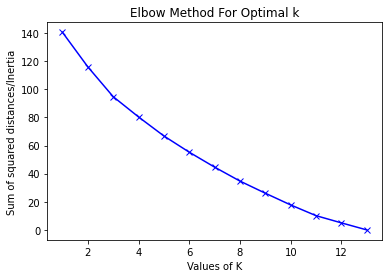

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Sum_of_squared_distances = []
K = range(1,14)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters,n_init=100, max_iter=1000, algorithm='auto', random_state = 0)
 kmeans.fit(df_encoded)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,n_init=100, max_iter=10000, algorithm='auto', random_state = 0)
clusters = kmeans.fit_predict(df_encoded)
labels = pd.DataFrame(clusters)
labeledCustomers = pd.concat((df,labels),axis=1)
labeledCustomers = labeledCustomers.rename({0:'labels'},axis=1)

In [ ]:
def highlight_greaterthan_1(s):
  # print(s.labels)
  if s.labels == 0:
    return ['background-color: red']*28
  elif s.labels == 1:
    return ['background-color: green']*28
  else:
    return ['background-color: blue']*28


labeledCustomers.style.apply(highlight_greaterthan_1, axis=1)

,Idade,Sexo,Região do Brasil (Local onde mora atualmente),Classe Comportamental,Grau de Instrução,Estado Civil,Filhos,Qual tipo de surdez?,Tem implante coclear?,Usa aparelho auditivo?,Qual foi a primeira Língua?,Qual a língua de preferência?,Sabe Libras?,Quando aprendeu Libras?,Nível de Leitura em Português,Nível de Escrita em Português,Quando aprendeu Português?,Oraliza?,Faz leitura labial?,Como se comunica com a família?,Como se comunica com desconhecidos?,Como se comunica com amigos?,Usa algum app para se comunicar?,Usa legendas?,Compra em loja física?,Compra online?,Preferência de Compra,labels
0,26-30,F,Sudeste,C,Superior completo (ou graduação): concluiu o curso de ensino superior (bacharelado ou licenciatura),União Estável,1,Adquirida,Não,Não,Português,Libras,Sim,Infância,Avançado,Avançado,Infância,Não Oraliza,Sim,Português Escrito + LIBRAS,Português Escrito,LIBRAS,Sim,Sim,Sim,Não,Loja Física,1
1,26-30,F,Sudeste,C,Superior incompleto (ou graduação): não concluiu o curso de ensino superior (bacharelado ou licenciatura),Solteiro,0,Adquirida,Não,Não,Português,Libras,Sim,Adolescência,Avançado,Avançado,Infância,Sim com familiares,Sim,Português Escrito + Gestos Caseiros + Oralização,Português Escrito + LIBRAS,LIBRAS,Sim,Sim,Sim,Sim,nan,2
2,21-25,M,Nordeste,C,Superior incompleto (ou graduação): não concluiu o curso de ensino superior (bacharelado ou licenciatura),nan,0,Congênita,Não,Já usou mas não usa mais,Libras,Libras,Sim,Infância,Avançado,Avançado,Infância,Sim com familiares,Sim,Português Escrito + LIBRAS + Oralização,Português Escrito,LIBRAS,Não,Sim,Sim,Não,Loja Física,1
3,41-45,M,Sudeste,B,Superior completo (ou graduação): concluiu o curso de ensino superior (bacharelado ou licenciatura),Solteiro,0,Congênita,Sim,Já usou mas não usa mais,Português,Português,Sim,Adulto,Avançado,Avançado,Infância,Sim com todos,Sim,Português Escrito + Oralização,Português Escrito + Oralização,LIBRAS + Oralização,Sim,Sim,Sim,Sim,Loja Online,2
4,31-35,M,Nordeste,C,Superior completo (ou graduação): concluiu o curso de ensino superior (bacharelado ou licenciatura),Solteiro,0,Adquirida,Não,Já usou mas não usa mais,Português,Libras,Sim,Infância,Avançado,Avançado,Infância,Sim com familiares,Sim,Português Escrito + Gestos Caseiros + Oralização,Português Escrito + Gestos Caseiros + Oralização,LIBRAS,Sim,Sim,Não,Sim,Loja Online,2
5,31-35,M,Sudeste,B,Superior completo (ou graduação): concluiu o curso de ensino superior (bacharelado ou licenciatura),União Estável,2,Congênita,Não,Já usou mas não usa mais,Libras,Libras,Sim,Infância,Avançado,Básico,Infância,Sim com familiares,Sim,LIBRAS + Oralização,Português Escrito,LIBRAS,Sim,Sim,Sim,Sim,nan,1
6,26-30,F,Nordeste,C,Superior incompleto (ou graduação): não concluiu o curso de ensino superior (bacharelado ou licenciatura),Solteiro,0,Congênita,Não,Já usou mas não usa mais,Libras,Libras,Sim,Infância,Avançado,Avançado,Infância,Não Oraliza,Sim,Gestos Caseiros + Oralização,Português Escrito,LIBRAS,Sim,Sim,Sim,Sim,Loja Online,1
7,31-35,F,Sudeste,C,Superior incompleto (ou graduação): não concluiu o curso de ensino superior (bacharelado ou licenciatura),União Estável,0,Congênita,Não,Já usou mas não usa mais,Libras,Libras,Sim,Infância,Avançado,Avançado,Infância,Não Oraliza,Sim,Português Escrito + Gestos Caseiros,Português Escrito,LIBRAS,Sim,Sim,Sim,Sim,Loja Física,1
8,51-55,M,Sul,B,Mestrado: pós-graduação que garante o grau de mestre em determinada área,Casado,0,Congênita,Não,Já usou mas não usa mais,Português,Libras,Sim,Adolescência,Avançado,Avançado,Infância,Sim com familiares,Sim,Português Escrito + Gestos Caseiros + Oralização,Português Escrito,LIBRAS,Não,Não,Sim,Sim,Loja Física + Loja Online,2
9,21-25,M,Sul,CD,Superior incompleto (ou graduação): não concluiu o curso de ensino superior (bacharelado ou licenciatura),Solteiro,0,Congênita,Não,Não,Libras,Libras,Sim,Infância,Avançado,Básico,Infância,Não Oraliza,Não,Português Escrito,Português Escrito,LIBRAS,Sim,Sim,Sim,Sim,Loja Física,1


In [ ]:
labeledCustomers.to_csv('clusters.csv',encoding='utf-8-sig')